### Cleaning scraped dataset from Amazon

In this notebook, the scraped dataset of reviews from third-party sellers obtained from third-party sellers on Amazon.nl will be cleaned and labeled to be used with GAN-BERT.

In [369]:
# Importing necessary libraries
import pandas as pd
from langdetect import detect
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [370]:
# Reading dataset
df = pd.read_csv (r'C:\Users\Gebruiker\Desktop\amazon.csv')
df

,URL,Rating,Review Text,Author & Date,Company Name,Type of Company,BTW Number
0,https://www.amazon.nl/sp?ie=UTF8&seller=A3U82S...,5 van 5 sterren,"Trouble free transaction, fast delivery.",Door Marija op 18 juni 2022.,Hashtag Brothers GmbH,Particulier bedrijf,DE308752746
1,https://www.amazon.nl/sp?ie=UTF8&seller=A3U82S...,1 van 5 sterren,"<span id=""-expanded"" class=""expandable-expande...",Door July K. op 14 december 2021.,Hashtag Brothers GmbH,Particulier bedrijf,DE308752746
2,https://www.amazon.nl/sp?ie=UTF8&seller=A3U82S...,1 van 5 sterren,Niets ontvangen. Geen rozenbottel olie. Ook ge...,Door Swart de jan op 29 juni 2021.,Hashtag Brothers GmbH,Particulier bedrijf,DE308752746
3,https://www.amazon.nl/sp?ie=UTF8&seller=A3U82S...,5 van 5 sterren,Het product komt volledig overeen met de besch...,Door Marusya op 29 juni 2021.,Hashtag Brothers GmbH,Particulier bedrijf,DE308752746
4,https://www.amazon.nl/sp?ie=UTF8&seller=A3U82S...,4 van 5 sterren,snel en goed,Door Mike op 14 juni 2021.,Hashtag Brothers GmbH,Particulier bedrijf,DE308752746
...,...,...,...,...,...,...,...
29025,https://www.amazon.nl/sp?ie=UTF8&seller=A1EIYY...,5 van 5 sterren,Verkoper reageert snel op vragen en doet zijn ...,Door MTG Music Academy op 4 mei 2021.,shandongyingzhidianzishangwuyouxiangongsi,Particulier bedrijf,GB354607886
29026,https://www.amazon.nl/sp?ie=UTF8&seller=A3GQSC...,1 van 5 sterren,Geen antwoord op mijn opmerking. Ik wens een t...,Door Kaat op 25 juni 2021.,lvliangshilishiquyanzhentaowujinrizadian,Particulier bedrijf,NaN
29027,https://www.amazon.nl/sp?ie=UTF8&seller=A3GQSC...,5 van 5 sterren,Precies zoals ik bedoelde,Door Do Overtoom op 7 april 2021.,lvliangshilishiquyanzhentaowujinrizadian,Particulier bedrijf,NaN
29028,https://www.amazon.nl/sp?ie=UTF8&seller=A2H0HC...,1 van 5 sterren,zeer sl echt,Door simons op 18 november 2021.,foshanshinanhaiquyangzongweidianzishangwudian,Particulier bedrijf,NaN


### Cleaning the dataset

In [371]:
# Coverting the entire 'Review Text' column to strings in case some data is not in the string format already
df['Review Text'] = df['Review Text'].astype(str)

In [372]:
# Since the 'Review Text' is the main information in the dataset, all rows containing missing values will be removed from the dataset
df = df[~df["Review Text"].isnull()]

In [373]:
# Removing the remaining HTML code which appeared in the text of the longer reviews
df['Review Text'] = df['Review Text'].str.replace('<span id="-expanded" class="expandable-expanded-text">', '')
df['Review Text'] = df['Review Text'].str.replace('</span>', '')

In [376]:
# Translating the 'Rating' column from Dutch to English
df['Rating'] = df['Rating'].str.replace('van', 'out of')
df['Rating'] = df['Rating'].str.replace('sterren', 'stars')

In [ ]:
# Translating the 'Author & Date' column from Dutch to English
df['Author & Date'] = df['Author & Date'].str.replace('Door', 'By')
df['Author & Date'] = df['Author & Date'].str.replace('op', 'on')
df['Author & Date'] = df['Author & Date'].str.replace('januari', 'January')
df['Author & Date'] = df['Author & Date'].str.replace('februari', 'February')
df['Author & Date'] = df['Author & Date'].str.replace('maart', 'March')
df['Author & Date'] = df['Author & Date'].str.replace('april', 'April')
df['Author & Date'] = df['Author & Date'].str.replace('mei', 'May')
df['Author & Date'] = df['Author & Date'].str.replace('juni', 'June')
df['Author & Date'] = df['Author & Date'].str.replace('juli', 'July')
df['Author & Date'] = df['Author & Date'].str.replace('augustus', 'August')
df['Author & Date'] = df['Author & Date'].str.replace('september', 'September')
df['Author & Date'] = df['Author & Date'].str.replace('oktober', 'October')
df['Author & Date'] = df['Author & Date'].str.replace('november', 'November')
df['Author & Date'] = df['Author & Date'].str.replace('december', 'December')

In [377]:
# Creating a 'Country of Origin' column by taking the first two characters from the strings in 'BTW Number' while also removing all numerals
df['Country of Origin'] = df['BTW Number'].str[:2]
df['Country of Origin'] = df['Country of Origin'].str.replace('\d+', 'Unknown')

<ipython-input-377-f324f81e4519>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [378]:
# Putting countries that take up less than 0.5% into a category called 'Other' to further clean the dataset and to clear out incorrect labels
series = pd.value_counts(df['Country of Origin'])
mask = (series/series.sum() * 100).lt(0.5)
df['Country of Origin'] = np.where(df['Country of Origin'].isin(series[mask].index),'Other',df['Country of Origin'])
df['Country of Origin'] = df['Country of Origin'].fillna('Unknown')

In [ ]:
# Fully translating the column name 'BTW Number' to the English 'VAT Number'
df.rename(columns={'BTW Number': 'VAT Number')

In [379]:
# Adding a 'Label' column for GAN-BERT purposes, labeling will have to be done manually afterwards
df['Label'] = 'UNK'

In [374]:
# Creating a 'Review Length' column based on the 'Review Text' column, showing the total number of characters
df['Review Length'] = df['Review Text'].astype(str).apply(len)

In [375]:
# Creating a 'Word Count' column based on the 'Review Text' column, showing the total number of words
df['Word Count'] = df['Review Text'].apply(lambda x: len(str(x).split()))

### Exploring the dataset

In [380]:
# Setting an order to make the x-axis in the histograms containing 'Rating' more easily readable 
rating_order = ['1 out of 5 stars', '2 out of 5 stars', '3 out of 5 stars', '4 out of 5 stars', '5 out of 5 stars']

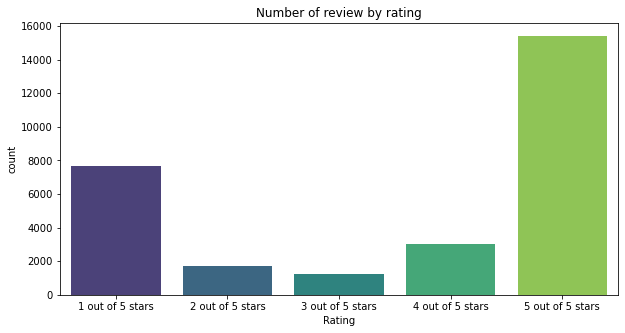

In [381]:
# Plotting the number of reviews per rating
plt.figure(figsize=(10, 5))
sns.countplot(x ='Rating', data = df, order = rating_order, palette = 'viridis')
plt.xlabel('Rating')
plt.title('Number of review by rating')
plt.show()

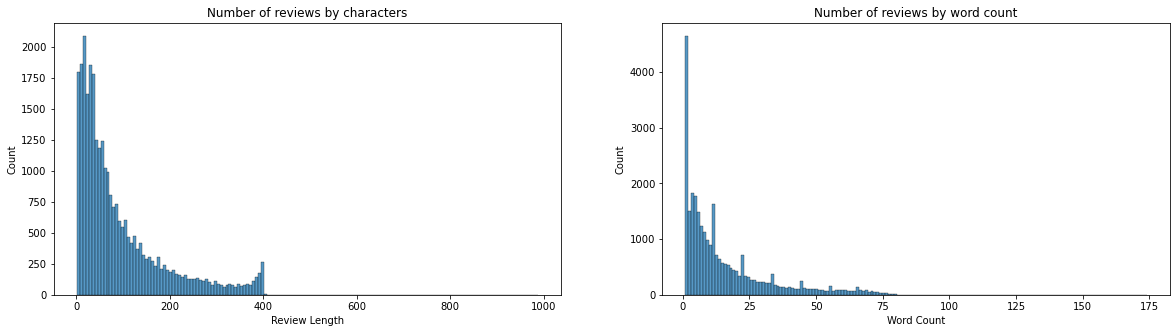

In [418]:
# Plotting the total number of reviews by length
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
sns.histplot(x ='Review Length', data = df, ax = ax1)
ax1.title.set_text('Number of reviews by characters')
sns.histplot(x ='Word Count', data = df, ax = ax2)
ax2.title.set_text('Number of reviews by word count')
plt.show()

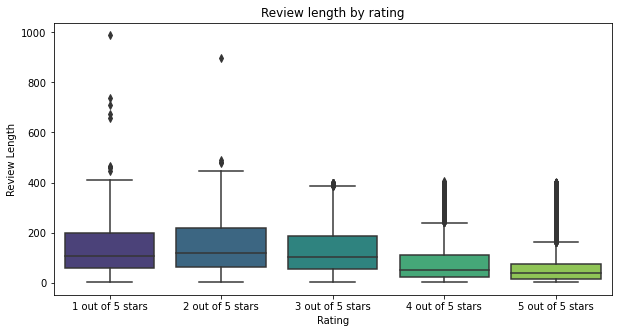

In [423]:
# Plotting the review length by rating
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'Rating', y ='Review Length', data = df, order = rating_order, palette = 'viridis')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.title('Review length by rating')
plt.show()

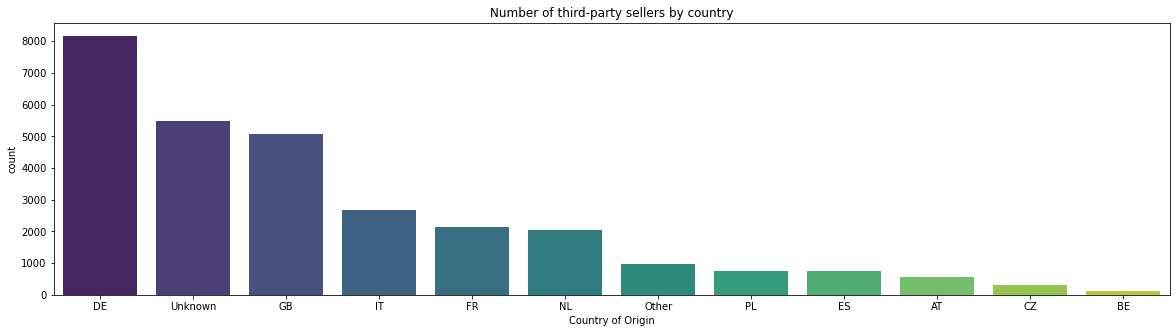

In [384]:
# Plotting the total number of reviews by country of origin, missing and incomprehensible data has been labeled as 'Unknown'
plt.figure(figsize=(20, 5))
sns.countplot(x = 'Country of Origin', data = df, order = df['Country of Origin'].value_counts().index, palette = 'viridis')
plt.xlabel('Country of Origin')
plt.title('Number of third-party sellers by country')
plt.show()

### Labeling the reviews based on their language

In [87]:
# Labeling the reviews from the dataset based on their language
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

df['Language'] = df['Review Text'].apply(det)

In [88]:
# Creating a dataframe with only the reviews labeled as English
df_en = df.loc[df['Language'] == 'en']

In [89]:
df_en

,URL,Rating,Review Text,Author & Date,Company Name,Type of Company,BTW Number,Label,Language
0,https://www.amazon.nl/sp?ie=UTF8&seller=A3U82S...,5 out of 5 stars,"Trouble free transaction, fast delivery.",Door Marija op 18 juni 2022.,Hashtag Brothers GmbH,Particulier bedrijf,DE308752746,UNK,en
1,https://www.amazon.nl/sp?ie=UTF8&seller=A3U82S...,1 out of 5 stars,The product description for this product says ...,Door July K. op 14 december 2021.,Hashtag Brothers GmbH,Particulier bedrijf,DE308752746,UNK,en
8,https://www.amazon.nl/sp?ie=UTF8&seller=AY7KRR...,1 out of 5 stars,I asked seller before buying if the bluray com...,Door C. op 12 januari 2022.,The Game Monkey Limited,Particulier bedrijf,GB208809693,UNK,en
11,https://www.amazon.nl/sp?ie=UTF8&seller=AY7KRR...,5 out of 5 stars,everything easy-peasy,Door W. Van Haperen op 14 oktober 2020.,The Game Monkey Limited,Particulier bedrijf,GB208809693,UNK,en
20,https://www.amazon.nl/sp?ie=UTF8&seller=A1E75R...,5 out of 5 stars,Good build quality. I recommend this,Door Chandramohan op 24 maart 2022.,PolirOne Shop di Cestaro Paola,Particulier bedrijf,IT02252900200,UNK,en
...,...,...,...,...,...,...,...,...,...
29015,https://www.amazon.nl/sp?ie=UTF8&seller=A11HJ9...,1 out of 5 stars,I like the colors but that's about it. Please ...,Door Amazon Customer op 12 juli 2021.,taiyuanshijinyuanquyixingshangdian,Particulier bedrijf,NaN,UNK,en
29016,https://www.amazon.nl/sp?ie=UTF8&seller=A11HJ9...,5 out of 5 stars,Good price and quality. Quick delivery.,Door RR Batohi op 31 augustus 2020.,taiyuanshijinyuanquyixingshangdian,Particulier bedrijf,NaN,UNK,en
29018,https://www.amazon.nl/sp?ie=UTF8&seller=A1A2VF...,5 out of 5 stars,"When there was a piece missing from the order,...",Door Lennart K. op 27 maart 2021.,xiangchengshiyiyongfushiyouxiangongsi,Particulier bedrijf,NaN,UNK,en
29021,https://www.amazon.nl/sp?ie=UTF8&seller=A1Y743...,5 out of 5 stars,"quick delivery, quality is acceptable for the ...",Door Jeroen op 2 november 2020.,shenzhenshi yuezhi keji youxiangongsi,Particulier bedrijf,N0096219A,UNK,en


In [90]:
# Creating a dataframe with only the reviews labeled as Dutch
df_nl = df.loc[df['Language'] == 'nl']

In [91]:
df_nl

,URL,Rating,Review Text,Author & Date,Company Name,Type of Company,BTW Number,Label,Language
2,https://www.amazon.nl/sp?ie=UTF8&seller=A3U82S...,1 out of 5 stars,Niets ontvangen. Geen rozenbottel olie. Ook ge...,Door Swart de jan op 29 juni 2021.,Hashtag Brothers GmbH,Particulier bedrijf,DE308752746,UNK,nl
3,https://www.amazon.nl/sp?ie=UTF8&seller=A3U82S...,5 out of 5 stars,Het product komt volledig overeen met de besch...,Door Marusya op 29 juni 2021.,Hashtag Brothers GmbH,Particulier bedrijf,DE308752746,UNK,nl
5,https://www.amazon.nl/sp?ie=UTF8&seller=A29VQ2...,3 out of 5 stars,"Hallo, De yogamat heeft beschadigingen, ik heb...",Door Anna B. op 18 september 2021.,Do your sports GmbH,Particulier bedrijf,DE298587287,UNK,nl
6,https://www.amazon.nl/sp?ie=UTF8&seller=A1B85K...,4 out of 5 stars,goed aangekomen en volgens beschrijving,Door Walter op 21 november 2020.,'t Klavertje Vier BVBA,Particulier bedrijf,NaN,UNK,nl
7,https://www.amazon.nl/sp?ie=UTF8&seller=A1B85K...,2 out of 5 stars,Voor een zeer lage prijs door Klavertje vier a...,Door Jeroen op 10 september 2020.,'t Klavertje Vier BVBA,Particulier bedrijf,NaN,UNK,nl
...,...,...,...,...,...,...,...,...,...
29025,https://www.amazon.nl/sp?ie=UTF8&seller=A1EIYY...,5 out of 5 stars,Verkoper reageert snel op vragen en doet zijn ...,Door MTG Music Academy op 4 mei 2021.,shandongyingzhidianzishangwuyouxiangongsi,Particulier bedrijf,GB354607886,UNK,nl
29026,https://www.amazon.nl/sp?ie=UTF8&seller=A3GQSC...,1 out of 5 stars,Geen antwoord op mijn opmerking. Ik wens een t...,Door Kaat op 25 juni 2021.,lvliangshilishiquyanzhentaowujinrizadian,Particulier bedrijf,NaN,UNK,nl
29027,https://www.amazon.nl/sp?ie=UTF8&seller=A3GQSC...,5 out of 5 stars,Precies zoals ik bedoelde,Door Do Overtoom op 7 april 2021.,lvliangshilishiquyanzhentaowujinrizadian,Particulier bedrijf,NaN,UNK,nl
29028,https://www.amazon.nl/sp?ie=UTF8&seller=A2H0HC...,1 out of 5 stars,zeer sl echt,Door simons op 18 november 2021.,foshanshinanhaiquyangzongweidianzishangwudian,Particulier bedrijf,NaN,UNK,nl


### Exporting the datasets as CSV files

In [93]:
# Exporting the English dataset as a CSV file
df_en.to_csv(r'C:\Users\Gebruiker\Desktop\Master Project\Datasets\Eigen Datasets\amazon_en.csv', index=False)

In [94]:
# Exporting the Dutch dataset as a CSV file
df_nl.to_csv(r'C:\Users\Gebruiker\Desktop\Master Project\Datasets\Eigen Datasets\amazon_nl.csv', index=False)

In the next notebook, 'preparing scraped dataset', the dataset of reviews labeled as English will be fully prepared to the used with GAN-BERT. 